In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
video_filename = "/stelmo/abhilasha/animals/Jaq/raw/20190827/20190827_Jaq_04_lineartrack.1.h264"

In [3]:
import cv2

video = cv2.VideoCapture(video_filename)

frame_size = int(video.get(3)), int(video.get(4))
# frame_rate = video.get(5)
frame_rate = 125

frame_size, frame_rate

((1272, 116), 125)

In [4]:
is_grabbed, frame = video.read()

In [5]:
if is_grabbed:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

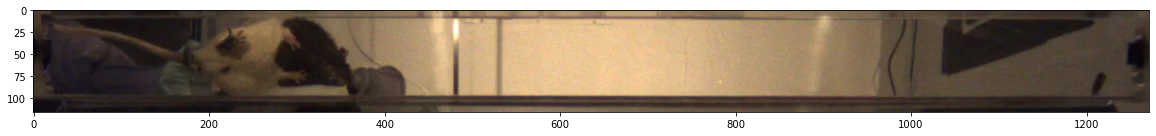

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 18))
plt.imshow(frame)

In [7]:
import cv2
import numpy as np
from tqdm.auto import tqdm


def make_behavior_video(video_filename,
                        position_info,
                        bodyparts,
                        bodyparts_to_rgb,
                        cm_to_pixels,
                        output_video_filename='output.mp4',
                        circle_radius=5,
                        frame_rate=None,
                        disable_progressbar=False):
    video = cv2.VideoCapture(video_filename)
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')

    frame_size = int(video.get(3)), int(video.get(4))
    if frame_rate is None:
        frame_rate = video.get(5)
    n_frames = int(position_info.shape[0])

    out = cv2.VideoWriter(output_video_filename, fourcc, frame_rate,
                          frame_size, True)
    
    for time_ind in tqdm(range(n_frames - 1), desc='frames',
                         disable=disable_progressbar):
        is_grabbed, frame = video.read()
        if is_grabbed:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            for bodypart in bodyparts:
                circle_center = np.asarray(
                    position_info.iloc[time_ind].loc[[f"{bodypart}_x", f"{bodypart}_y"]])

                if np.all(~np.isnan(circle_center)):
                    circle_center /= cm_to_pixels # convert to pixels
                    circle_center = tuple(circle_center.astype(int)) # convert to integer tuple
                    circle_color = bodyparts_to_rgb[bodypart]
                    cv2.circle(img=frame,
                               center=circle_center,
                               radius=circle_radius,
                               color=circle_color,
                               thickness=-1, # negative means filled
                               shift=cv2.CV_8U)
        
            out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        else:
            break

    video.release()
    out.release()
#     cv2.destroyAllWindows()

In [8]:
from src.load_data import get_position_info

epoch_key = 'Jaq', 2, 4

position_info = get_position_info(
    epoch_key, skip_linearization=True)

video_filename = "/stelmo/abhilasha/animals/Jaq/raw/20190827/20190827_Jaq_04_lineartrack.1.h264"

bodyparts_to_rgb = {
    'nose': (46, 49, 146),
    'tail': (0, 174, 239), 
    'tailBase': (0, 174, 239),
    'tailMid': (0, 174, 239),
    'tailTip': (0, 174, 239),
    'forepawL': (247, 149, 32),
    'forepawR': (134, 76, 158),
    'hindpawL': (255, 0, 255),
    'hindpawR': (195, 0, 23)
}
bodyparts = ['nose', 'forepawL', 'forepawR', 'hindpawL', 'hindpawR', 'tail']
cm_to_pixels = np.asarray([0.0939, 0.1712])
frame_rate = 125

make_behavior_video(video_filename,
                    position_info,
                    bodyparts,
                    bodyparts_to_rgb,
                    cm_to_pixels,
                    output_video_filename='linear_track_behavior_example.mp4',
                    circle_radius=8,
                    frame_rate=frame_rate,
                    disable_progressbar=False)

frames:   0%|          | 0/112566 [00:00<?, ?it/s]

In [9]:
from src.load_data import get_position_info

epoch_key = 'Jaq', 3, 16

position_info = get_position_info(
    epoch_key, skip_linearization=True)

video_filename = "/stelmo/abhilasha/animals/Jaq/raw/20190829/20190829_Jaq_16_wtrack.1.h264"

bodyparts_to_rgb = {
    'nose': (46, 49, 146),
    'tail': (0, 174, 239), 
    'tailBase': (0, 174, 239),
    'tailMid': (0, 174, 239),
    'tailTip': (0, 174, 239),
    'forepawL': (247, 149, 32),
    'forepawR': (134, 76, 158),
    'hindpawL': (255, 0, 255),
    'hindpawR': (195, 0, 23)
}
bodyparts = ['nose', 'forepawL', 'forepawR', 'hindpawL', 'hindpawR', 'tailBase']
cm_to_pixels = np.asarray([0.1602, 0.1712])
frame_rate = 125

make_behavior_video(video_filename,
                    position_info,
                    bodyparts,
                    bodyparts_to_rgb,
                    cm_to_pixels,
                    output_video_filename='wtrack_behavior_example.mp4',
                    circle_radius=8,
                    frame_rate=frame_rate,
                    disable_progressbar=False)

frames:   0%|          | 0/113029 [00:00<?, ?it/s]

In [10]:
from src.load_data import get_position_info

epoch_key = 'Jaq', 3, 16

position_info = get_position_info(
    epoch_key, skip_linearization=True)

video_filename = "/stelmo/abhilasha/animals/Jaq/raw/20190829/20190829_Jaq_16_wtrack.1.h264"

bodyparts_to_rgb = {
    'nose': (46, 49, 146),
    'tail': (0, 174, 239), 
    'tailBase': (0, 174, 239),
    'tailMid': (0, 174, 239),
    'tailTip': (0, 174, 239),
    'forepawL': (247, 149, 32),
    'forepawR': (134, 76, 158),
    'hindpawL': (255, 0, 255),
    'hindpawR': (195, 0, 23)
}
bodyparts = ['nose', 'forepawL', 'forepawR', 'hindpawL', 'hindpawR', 'tailBase', 'tailMid', 'tailTip']
cm_to_pixels = np.asarray([0.1602, 0.1712])
frame_rate = 125

make_behavior_video(video_filename,
                    position_info,
                    bodyparts,
                    bodyparts_to_rgb,
                    cm_to_pixels,
                    output_video_filename='Jaq_03_16_behavior_example.mp4',
                    circle_radius=8,
                    frame_rate=frame_rate,
                    disable_progressbar=False)

frames:   0%|          | 0/113029 [00:00<?, ?it/s]